## Setup

In [1]:
import sqlite3, pandas as pd, matplotlib.pyplot as plt

## Create Data

In [2]:
conn = sqlite3.connect("example.db")

conn.execute('''
CREATE TABLE IF NOT EXISTS name_table(StudentID TEXT PRIMARY KEY, Name TEXT);''')

conn.commit()

In [7]:
conn = sqlite3.connect("example.db")

conn.execute("INSERT INTO name_table VALUES('V001', 'Abe');")
conn.execute("INSERT INTO name_table VALUES('V002', 'Abhay');")
conn.execute("INSERT INTO name_table VALUES('V003', 'Acelin');")
conn.execute("INSERT INTO name_table VALUES('V004', 'Adelphos');")

conn.commit()

In [8]:
for i in conn.execute('''Select * From name_table'''):
  print(i)

('V001', 'Abe')
('V002', 'Abhay')
('V003', 'Acelin')
('V004', 'Adelphos')


In [9]:
conn.execute('''
CREATE TABLE IF NOT EXISTS mark_table(StudentID TEXT PRIMARY KEY, Total_marks INTEGER);''')

conn.commit()

In [10]:
conn.execute("INSERT INTO mark_table VALUES('V001', 95);")
conn.execute("INSERT INTO mark_table VALUES('V002', 80);")
conn.execute("INSERT INTO mark_table VALUES('V003', 74);")
conn.execute("INSERT INTO mark_table VALUES('V004', 81);")

conn.commit()

In [11]:
for i in conn.execute('''Select * From mark_table'''):
  print(i)

('V001', 95)
('V002', 80)
('V003', 74)
('V004', 81)


## Section 1

### Q1

In [28]:
query = '''Select nt.StudentID, nt.Name From name_table nt
      Where nt.StudentID IN 
      (Select mt.StudentID From Mark_table mt
      Where mt.Total_marks > (Select Total_marks From Mark_table Where StudentID == 'V002'));'''

for e in conn.execute(query):
  print(e)

('V001', 'Abe')
('V004', 'Adelphos')


### Q2

In [36]:
name_table = pd.read_sql_query("Select * From name_table", conn)

In [37]:
name_table.head()

,StudentID,Name
0,V001,Abe
1,V002,Abhay
2,V003,Acelin
3,V004,Adelphos


In [38]:
mark_table = pd.read_sql_query("Select * From mark_table", conn)

In [39]:
mark_table

,StudentID,Total_marks
0,V001,95
1,V002,80
2,V003,74
3,V004,81


In [90]:
def chnage_letter_case(df, col_name):
  df[col_name] = df[col_name].apply(lambda x: x.upper() if ("e" in x) or ("E" in x) else x.lower())

  return df

In [91]:
chnage_letter_case(name_table.copy(), "Name")

,StudentID,Name
0,V001,ABE
1,V002,abhay
2,V003,ACELIN
3,V004,ADELPHOS


### Q3

In [109]:
def avg_by_case(df1, df2, col_name1, col_name2):
  df1 = chnage_letter_case(df1, col_name1)
  df1["upper_case"] = df1[col_name1].str.isupper()
  new_df = pd.merge(df1, df2, on=col_name2)
  print(new_df)
  
  return new_df.groupby("upper_case").mean()

In [110]:
avg_by_case(name_table.copy(), mark_table.copy(), "Name", "StudentID")

  StudentID      Name  upper_case  Total_marks
0      V001       ABE        True           95
1      V002     abhay       False           80
2      V003    ACELIN        True           74
3      V004  ADELPHOS        True           81


,Total_marks
upper_case,
False,80.000000
True,83.333333


## Section 2

### Q1

In [143]:
!wget https://raw.githubusercontent.com/mathcoder3141/blog-data-files/master/Congress_White_House.csv

--2020-11-19 02:14:40--  https://raw.githubusercontent.com/mathcoder3141/blog-data-files/master/Congress_White_House.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-11-19 02:14:40 ERROR 404: Not Found.



### Q2

In [125]:
!curl https://raw.githubusercontent.com/fractalbass/data_engineer/master/data.csv > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  229k  100  229k    0     0  1520k      0 --:--:-- --:--:-- --:--:-- 1510k


In [129]:
temp_data = pd.read_csv("data.csv", sep = ",", names = ["ID", "val"], header = None)

In [130]:
temp_data.head()

,ID,val
0,0,23.827290
1,1,23.589108
2,2,24.529556
3,3,16.684580
4,4,22.075507


In [134]:
temp_data["val"].describe()

count    10000.000000
mean        23.036075
std          2.995296
min         11.248686
25%         21.007801
50%         23.024042
75%         25.069083
max         33.286533
Name: val, dtype: float64

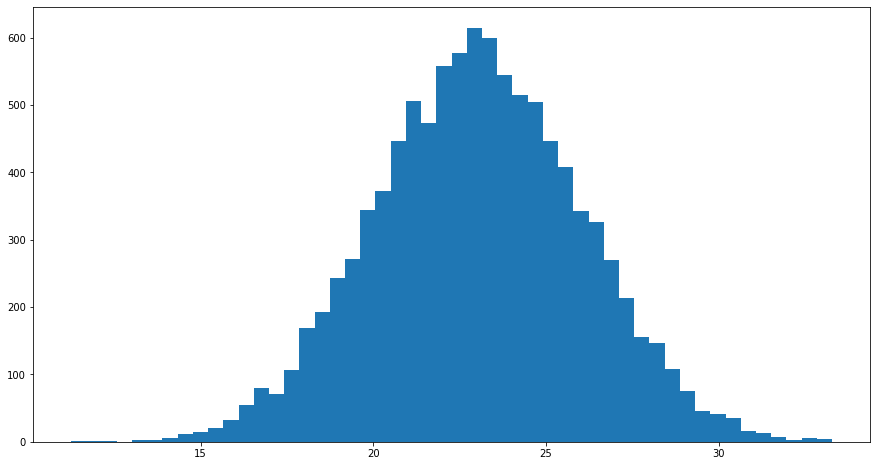

In [139]:
plt.figure(figsize = (15, 8))
plt.hist(temp_data["val"].values, bins = 50)
plt.show()

The data is normally distributed with mean 23 and std 2.99.

## Section 3

Pandas fillna method is the only way I know to impute null values and it is fast.



## Section 4

Python has a library called threading and it has a function called Timer that allows people to write a script for this purpose. 



## Section 5

The math professors at Oregon State University are my favorite Mathematicians. They have a great impact on my life.
1.   Prof. Ossiander, my undergraduate advisor and Probability professor, and Prof. Peszynska, who taught me Advanced Calculus, helped me be a better problem solver. They both assigned tremendous difficult problems each week. After surviving their classes, I believe practics make things perfect.
2.   Prof. Fardani, my MS thesis advisor and Numerical Analysis professor, sparked my interest in Applied Mathematics. He always had good and interesting Matlab simulations to explain complex subjects. Recently, he wrote a simple Matlab program to illustrate how Covid-19 spread.

